In [ ]:
# -*- coding: utf-8 -*-
# -*- author : Vincent Roduit - Fabio Palmisano -*-
# -*- date : 2024-01-20 -*-
# -*- Last revision: 2024-01-20 (Vincent Roduit)-*-
# -*- python version : 3.11.6 -*-
# -*- Description: Notebook that summarizes results-*-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/EE-411-FOIL-Project/source

/content/drive/MyDrive/EE-411-FOIL-Project/source


# <center> EE - 411: Fundamentals of Inference and Learning </center>
## <center> Ecole Polytechnique Fédérale de Lausanne </center>
### <center>Deep Double Descent: When Bigger Models and More Data Hurt </center>
---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Import librairies
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import copy
import pickle
import seaborn as sns
import time

In [ ]:
# Import files
import constants
from models.resnet18k import make_resnet18k
from models.mcnn import make_cnn
from training_utils import*
from functions import*
from display_functions import*

# 1. Data preprocessing

## 1.1 Load data

### 1.1.1 Normal version

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

#### MNIST

In [ ]:
#Train Dataset
MNIST_train_dataset = torchvision.datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

#Test Dataset
MNIST_test_dataset = torchvision.datasets.MNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

#### CIFAR 10

In [ ]:
#Train Dataset
CIFAR_10_train_dataset = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

#Test Dataset
CIFAR_10_test_dataset = torchvision.datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


#### CIFAR 100

In [ ]:
#Train Dataset
CIFAR_100_train_dataset = torchvision.datasets.CIFAR100(
    root='./data/',
    train=True,
    download=True,
    transform=transform)

#Test Dataset
CIFAR_100_test_dataset = torchvision.datasets.CIFAR100(
    root='./data/',
    train=False,
    download=True,
    transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### 1.1.2. Augmented version

In [ ]:
transform_augmented_cifar = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
transform_augmented_mnist = transforms.Compose([
    transforms.RandomCrop(28, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

#### MNIST

In [ ]:
#Train Dataset
MNIST_train_dataset_aug = torchvision.datasets.MNIST(
    root='./data/',
    train=True,
    download=True,
    transform=transform_augmented_mnist)

#Test Dataset
MNIST_test_dataset_aug = torchvision.datasets.MNIST(
    root='./data/',
    train=False,
    download=True,
    transform=transform_augmented_mnist)

#### CIFAR 10

In [ ]:
#Train Dataset
CIFAR_10_train_dataset_aug = torchvision.datasets.CIFAR10(
    root='./data/',
    train=True,
    download=True,
    transform=transform_augmented_cifar)

#Test Dataset
CIFAR_10_test_dataset_aug = torchvision.datasets.CIFAR10(
    root='./data/',
    train=False,
    download=True,
    transform=transform_augmented_cifar)

Files already downloaded and verified
Files already downloaded and verified


#### CIFAR 100

In [ ]:
#Train Dataset
CIFAR_100_train_dataset_aug = torchvision.datasets.CIFAR100(
    root='./data/',
    train=True,
    download=True,
    transform=transform_augmented_cifar)

#Test Dataset
CIFAR_100_test_dataset_aug = torchvision.datasets.CIFAR100(
    root='./data/',
    train=False,
    download=True,
    transform=transform_augmented_cifar)

Files already downloaded and verified
Files already downloaded and verified


## 1.3 Vizualize the Dataset

### 1.3.1 Define class dictionaries

In [ ]:
#CIFAR-10
metadata_path = './data/cifar-10-batches-py/batches.meta'
metadata = unpickle(metadata_path)
cifar10_dict = [label.decode('utf-8') for label in metadata[b'label_names']]

#CIFAR-100
metadata_path = './data/cifar-100-python/meta'
metadata = unpickle(metadata_path)
cifar100_dict = [label.decode('utf-8') for label in metadata[b'fine_label_names']]

#### MNIST

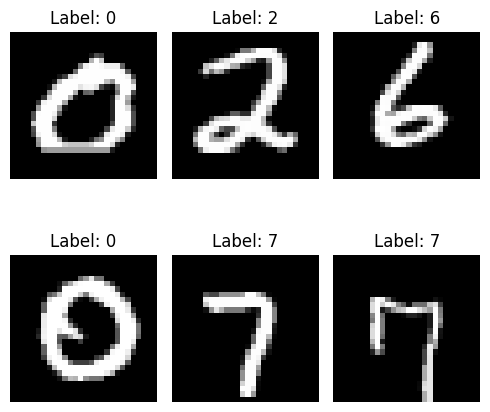

In [ ]:
visualize_dataset((np.array(MNIST_train_dataset.data), np.array(MNIST_train_dataset.targets)), num_images=6)

#### CIFAR 10

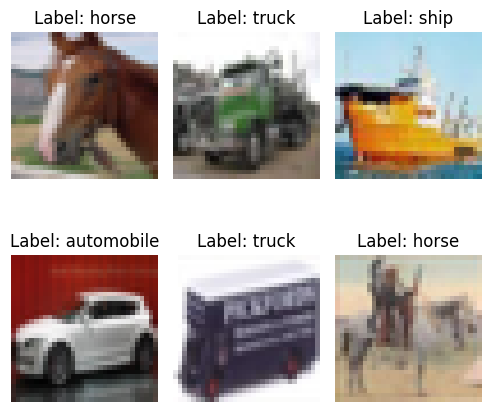

In [ ]:
visualize_dataset((np.array(CIFAR_10_train_dataset.data), np.array(CIFAR_10_train_dataset.targets)), num_images=6,label_names=cifar10_dict)

#### CIFAR 100

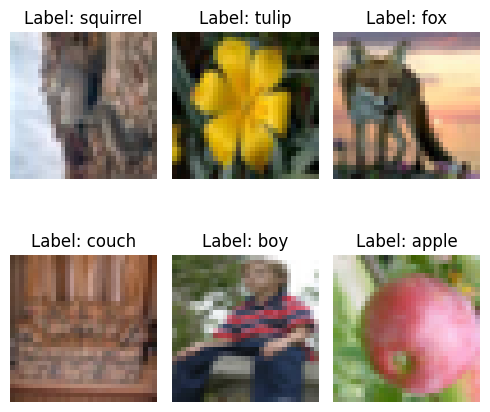

In [ ]:
visualize_dataset((np.array(CIFAR_100_train_dataset.data), np.array(CIFAR_100_train_dataset.targets)), num_images=6,label_names=cifar100_dict)

# 2. Produce Figure 4

## 2.1 MNIST

In [ ]:
width_model_list = np.linspace(1, 64, 30,dtype=int)
noise_ratio_list = [0]

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_models(noise_ratio_list, width_model_list, MNIST_train_dataset_aug, MNIST_test_dataset_aug)

Model with noise ratio 0


Training for width 64/64

Epoch 50/50: Loss = 0.013888323390738496

Noise ratio 0 done. Duration: 3:20:25.058875
******************


In [ ]:
def save_pickle(result, file_path="pickle"):
    """Save a variable in a binary format

    Args:
        result: dataFrame
        file_path: file path where to store this variable

    Returns:
    """
    with open(file_path, "wb") as file:
        pickle.dump(result, file)

In [ ]:
save_pickle(train_losses,file_path="train_losses_0.pkl")
save_pickle(train_accuracies,file_path="train_accuracies_0.pkl")
save_pickle(test_losses,file_path="test_losses_0.pkl")
save_pickle(test_accuracies,file_path="test_accuracies_0.pkl")

In [ ]:
width_model_list = np.linspace(1, 64, 30,dtype=int)
noise_ratio_list = [0.1]

In [ ]:
train_losses, train_accuracies, test_losses, test_accuracies = train_models(noise_ratio_list, width_model_list, MNIST_train_dataset_aug, MNIST_test_dataset_aug)

Model with noise ratio 0.1


Training for width 64/64

Epoch 50/50: Loss = 0.46032037199298037

Noise ratio 0.1 done. Duration: 3:30:33.078418
******************


In [ ]:
save_pickle(train_losses,file_path="train_losses_10.pkl")
save_pickle(train_accuracies,file_path="train_accuracies_10.pkl")
save_pickle(test_losses,file_path="test_losses_10.pkl")
save_pickle(test_accuracies,file_path="test_accuracies_10.pkl")

## With 0.2

In [21]:
width_model_list = np.linspace(1, 64, 30,dtype=int)
noise_ratio_list = [0.2]

In [22]:
train_losses, train_accuracies, test_losses, test_accuracies = train_models(noise_ratio_list, width_model_list, MNIST_train_dataset_aug, MNIST_test_dataset_aug)

Model with noise ratio 0.2


Training for width 64/64

Epoch 25/50: Loss = 0.9118277302271203

Epoch 50/50: Loss = 0.7902142616766917

Noise ratio 0.2 done. Duration: 3:25:26.550983
******************


In [23]:
save_pickle(train_losses,file_path="train_losses_02.pkl")
save_pickle(train_accuracies,file_path="train_accuracies_02.pkl")
save_pickle(test_losses,file_path="test_losses_02.pkl")
save_pickle(test_accuracies,file_path="test_accuracies_02.pkl")

NameError: name 'save_pickle' is not defined